In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import sqlite3
from sqlite3 import Error
pd.options.display.float_format = '{:,}'.format

In [3]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 26.4 GB  | Proc size: 152.4 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
DIR = '/content/gdrive/My Drive/Goodreads/data'
DIR_GENRE = '/content/gdrive/My Drive/Goodreads/data/genre/'

In [0]:
def load_data(file_name):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            
            if count > 2000000:
              data.append(d) # just for test
            
            
            if count % 100000 == 0:
                print(count, end=',\n')
            
            if count == 3000000:
                break # just for test
            
            # break if reaches the 100th line
            #if (head is not None) and (count > head):
                #break
    return data

In [0]:
#import codecs
#file_name = os.path.join(DIR, 'goodreads_books.json.gz')
#f = open(file_name)

In [5]:
books = load_data(os.path.join(DIR, 'goodreads_books.json.gz'))

100000,
200000,
300000,
400000,
500000,
600000,
700000,
800000,
900000,
1000000,
1100000,
1200000,
1300000,
1400000,
1500000,
1600000,
1700000,
1800000,
1900000,
2000000,
2100000,
2200000,
2300000,


In [0]:
df_books0 = pd.DataFrame(books)

In [7]:
df_books0.shape

(360655, 29)

In [0]:
df_books = df_books0[['average_rating','book_id','image_url','title','description','ratings_count']].copy()

In [9]:
df_books.head()

,average_rating,book_id,image_url,title,description,ratings_count
0,3.00,1917991,https://s.gr-assets.com/assets/nophoto/book/11...,Discovering the Body,Discovering the Bodyis a gripping novel filled...,74
1,3.59,25054174,https://images.gr-assets.com/books/1425299987m...,Uimari,Ruotsalaisen trillerin uusi tahti!Kansainvalis...,57
2,4.18,25859891,https://s.gr-assets.com/assets/nophoto/book/11...,Unleashed: Part 1: Part 1 of 2 (V Plague Book 11),Looking to purchase the full-length version? V...,13
3,3.66,2819218,https://images.gr-assets.com/books/1329298568m...,El hombre de los círculos azules (Comisario Ad...,<>A los parisinos les divierte. Desde hace cua...,62
4,4.04,28698323,https://images.gr-assets.com/books/1453758741m...,Jagged Vengeance (The Alpha Billionaire's Reve...,***BOOK 6 in the passionate dark romance serie...,26


In [10]:
testform = df_books['book_id']
testform = testform.drop_duplicates(keep='first')
print(testform.shape)

(360655,)


In [11]:
df_books = df_books[~df_books.image_url.str.contains("nophoto")]
print(df_books.shape)

(210670, 6)


In [12]:
#df_books['ratings_count'].astype(str).astype(int)
df_books['ratings_count'] = pd.to_numeric(df_books['ratings_count'], errors='coerce')
df_books = df_books.dropna(subset=['ratings_count'])
print(df_books.shape)
df_books['ratings_count'] = df_books['ratings_count'].astype(int)

(210591, 6)


In [13]:
df_books['ratings_count'].dtypes

dtype('int64')

In [14]:
bins = [0,30,100,1000,10000]
pd.cut(df_books['ratings_count'], bins=bins).value_counts()

(0, 30]          123121
(30, 100]         43029
(100, 1000]       35165
(1000, 10000]      7196
Name: ratings_count, dtype: int64

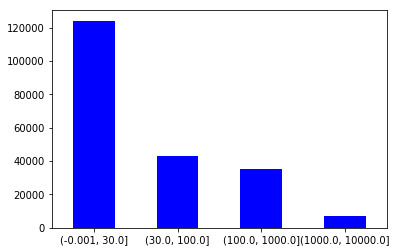

In [15]:
import matplotlib.pyplot as plt

out = pd.cut(df_books['ratings_count'], bins=[0,30,100,1000,10000], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

In [16]:
df_books = df_books[df_books.ratings_count >= 100]
print(df_books.shape)

(43752, 6)


In [0]:
export_csv = df_books.to_csv (r'/content/gdrive/My Drive/Goodreads/data/df_books3.csv', index = None, header=True)

In [0]:
df_books1 = pd.read_csv(os.path.join(DIR, 'df_books1.csv'))
df_books2 = pd.read_csv(os.path.join(DIR, 'df_books2.csv'))
df_books3 = pd.read_csv(os.path.join(DIR, 'df_books3.csv'))

In [0]:
df_books = pd.concat([df_books1,df_books2,df_books3])

In [21]:
df_books.shape

(291835, 6)

In [23]:
df_books.head()

,average_rating,book_id,image_url,title,description,ratings_count
0,4.03,7327624,https://images.gr-assets.com/books/1304100136m...,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",Omnibus book club edition containing the Ladie...,140
1,3.81,287149,https://images.gr-assets.com/books/1328768789m...,The Devil's Notebook,"Wisdom, humor, and dark observations by the fo...",986
2,3.93,6066814,https://images.gr-assets.com/books/1328724803m...,"Crowner Royal (Crowner John Mystery, #13)","London, 1196. At the command of Richard the Li...",186
3,4.33,33394837,https://images.gr-assets.com/books/1493114742m...,The House of Memory (Pluto's Snitch #2),NaN,269
4,4.26,89376,https://images.gr-assets.com/books/1406508230m...,Heaven,What is Heaven really going to be like? What w...,7345


In [0]:
df_books = df_books.dropna()

In [27]:
df_books.shape

(276027, 6)

In [0]:
export_csv = df_books.to_csv (r'/content/gdrive/My Drive/Goodreads/data/df_books.csv', index = None, header=True)